In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
adata = sc.read_h5ad('h5ad/df.fil3_gex.h5ad')
adata

AnnData object with n_obs × n_vars = 916806 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [4]:
adata.obsm['X_umap'] = adata.obsm['X_umapafterharmony_rna']

In [5]:
adata.obs[adata.obs['sample_id'] == 'NA'][['merged_souporcell_cluster', 'merged_souporcell_status', 'patient_id', 'sample_id',]]

merged_souporcell_cluster  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1                       2/1   
UK-CIC10689738+UK-CIC10690026_AAACCTGCACGCGAAA-1                       1/2   
UK-CIC10689738+UK-CIC10690026_AAACCTGTCTGCGTAA-1                       0/1   
UK-CIC10689738+UK-CIC10690026_AAACGGGCACAAGACG-1                       2/3   
UK-CIC10689738+UK-CIC10690026_AAACGGGCATTAACCG-1                       2/1   
...                                                                    ...   
UK-CIC10690384+UK-CIC10690576_TTTGTCAAGTTACGGG-1                         1   
UK-CIC10690384+UK-CIC10690576_TTTGTCACACTACAGT-1                         1   
UK-CIC10690384+UK-CIC10690576_TTTGTCACATGTCGAT-1                       0/4   
UK-CIC10690384+UK-CIC10690576_TTTGTCAGTTACCGAT-1                         3   
UK-CIC10690384+UK-CIC10690576_TTTGTCATCACATACG-1                         1   

                                                 merged_souporcell_status  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACCTGCACGCGAAA-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACCTGTCTGCGTAA-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACGGGCACAAGACG-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACGGGCATTAACCG-1                  doublet   
...                                                                   ...   
UK-CIC10690384+UK-CIC10690576_TTTGTCAAGTTACGGG-1                  singlet   
UK-CIC10690384+UK-CIC10690576_TTTGTCACACTACAGT-1                  singlet   
UK-CIC10690384+UK-CIC10690576_TTTGTCACATGTCGAT-1                  doublet   
UK-CIC10690384+UK-CIC10690576_TTTGTCAGTTACCGAT-1                  singlet   
UK-CIC10690384+UK-CIC10690576_TTTGTCATCACATACG-1                  singlet   

                                                  patient_id sample_id  
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACCTGCACGCGAAA-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACCTGTCTGCGTAA-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACGGGCACAAGACG-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACGGGCATTAACCG-1        NULL        NA  
...                                                      ...       ...  
UK-CIC10690384+UK-CIC10690576_TTTGTCAAGTTACGGG-1  unresolved        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCACACTACAGT-1  unresolved        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCACATGTCGAT-1        NULL        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCAGTTACCGAT-1  unresolved        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCATCACATACG-1  unresolved        NA  

[185615 rows x 4 columns]

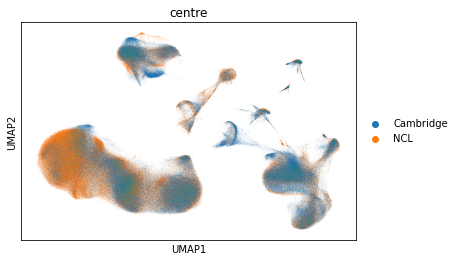

In [6]:
sc.pl.umap(adata, color = 'centre')

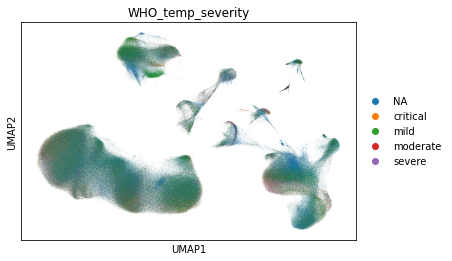

In [7]:
sc.pl.umap(adata, color = 'WHO_temp_severity')

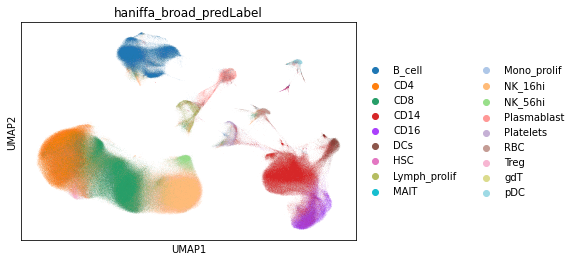

In [8]:
sc.pl.umap(adata, color = 'haniffa_broad_predLabel')

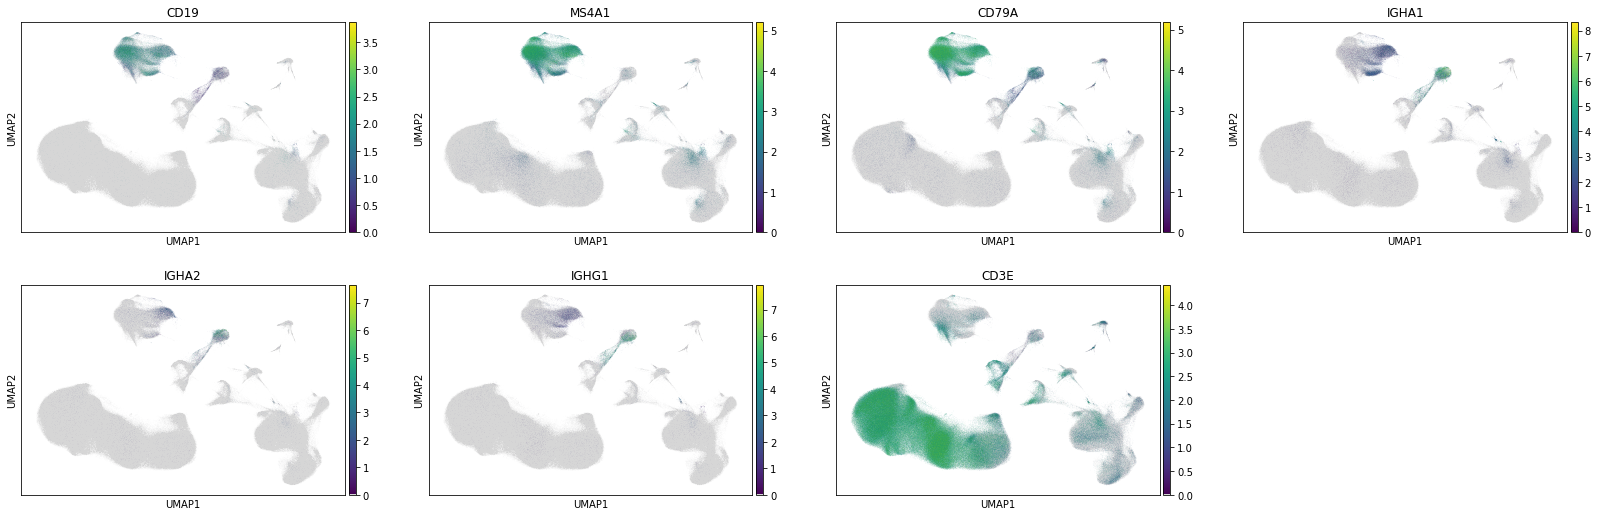

In [9]:
sc.pl.umap(adata, color = ['CD19', 'MS4A1', 'CD79A', 'IGHA1', 'IGHA2', 'IGHG1', 'CD3E'], color_map = tools.cmp())

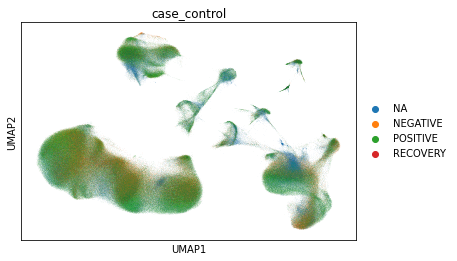

In [10]:
sc.pl.umap(adata, color = 'case_control')

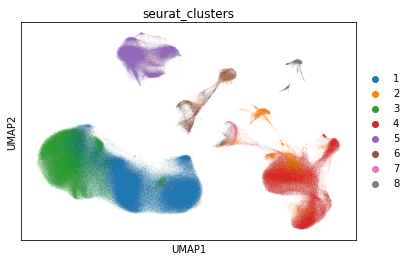

In [11]:
sc.pl.umap(adata, color = 'seurat_clusters')

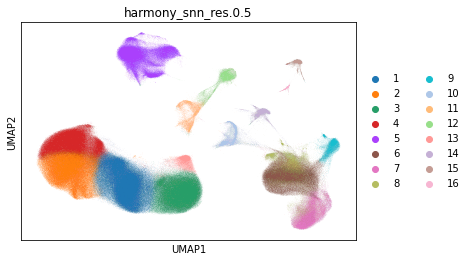

In [12]:
sc.pl.umap(adata, color = 'harmony_snn_res.0.5')

In [13]:
# fix the metadata
meta = pd.read_csv('sc_meta.csv')
meta.head()

sample_id individual_id ethnicity sex  calc_age                  ihd  \
0  C126_3004          C126     asian   M        64                   no   
1   C89_2104           C89     asian   F        70             yes.cabg   
2  C132_1105          C132     asian   F        77             yes.cabg   
3   C60_1604           C60     white   M        80                   no   
4   C23_1504           C23     asian   F        78  yes.no.intervention   

  previous_vte copd diabetes      smoking  ... sample_date temp_WCC temp_neut  \
0           no   no       no        never  ...  30/04/2020      6.4       3.6   
1           no   no   yes.T2  not.current  ...  21/04/2020      NaN       NaN   
2           no   no   yes.T2  not.current  ...  11/05/2020      NaN       NaN   
3           no  yes   yes.T2  not.current  ...  16/04/2020      3.8       2.5   
4           no   no   yes.T2        never  ...  15/04/2020      NaN       NaN   

  temp_mono temp_lymph temp_CRP temp_ddimer temp_ferritin temp_trop  \
0       0.7        1.7      0.6       913.0         200.0      12.0   
1       NaN        NaN      NaN         NaN           NaN       NaN   
2       NaN        NaN      NaN         NaN           NaN       NaN   
3       0.2        0.9     16.8      1005.0        1936.0      35.0   
4       NaN        NaN      NaN         NaN           NaN       NaN   

  WHO_temp_severity  
0              mild  
1               NaN  
2              mild  
3          moderate  
4          moderate  

[5 rows x 30 columns]

In [14]:
adata.obs['individual_id'] = [x.split('_')[0] for x in adata.obs['sample_id']]

/tmp/ipykernel_62641/1222814385.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs['individual_id'] = [x.split('_')[0] for x in adata.obs['sample_id']]


/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'individual_id' as categorical


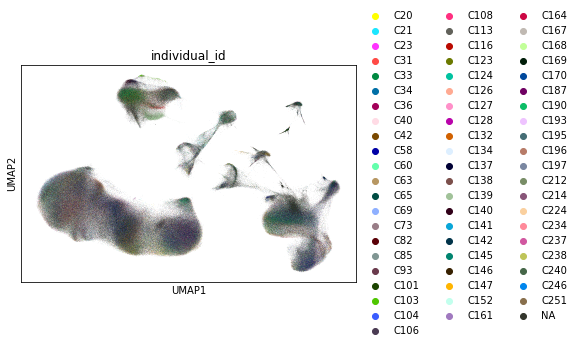

In [15]:
sc.pl.umap(adata, color = 'individual_id')

In [16]:
# create a separate object so that i can use the extract the BCRs
# df = adata.obs[~(adata.obs['individual_id'] == 'NA')]
# df.shape

In [17]:
# df.to_csv('h5ad/df.fil3.kt.metadata_for_bcr.csv')

In [18]:
# !gzip h5ad/df.fil3.kt.metadata_for_bcr.csv

### First look

In [19]:
# subset to B cell looking clusters
bdata = adata[adata.obs['harmony_snn_res.0.5'].isin(['5', '12'])].copy()
bdata

AnnData object with n_obs × n_vars = 111873 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [21]:
# remove CLL samples
bdata = bdata[~(bdata.obs['individual_id'].isin(['C139', 'C116']))].copy()
bdata

AnnData object with n_obs × n_vars = 100242 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

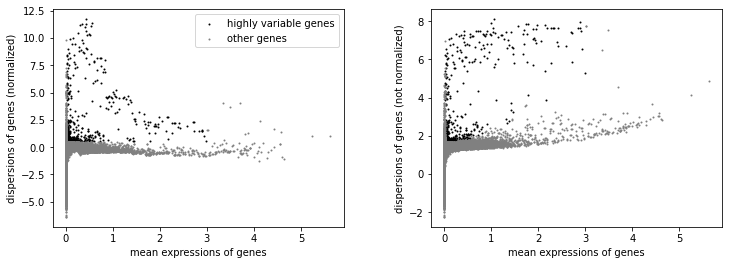

In [22]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

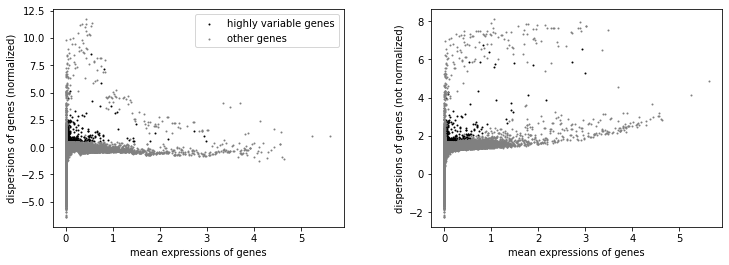

In [23]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads, and mitochondrial pseudogenes
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL|^MTRNR', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [24]:
# transfer to .raw slot
bdata.raw = bdata

In [25]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 100242 × 411
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartmen

In [26]:
import scvi

Global seed set to 0


In [27]:
scvi.model.SCVI.setup_anndata(
    bdata,
    layer="counts",
    batch_key = 'orig.ident',
    categorical_covariate_keys = ['individual_id'],
    continuous_covariate_keys=['nCount_RNA', 'percentMito']
)

INFO     Using batches from adata.obs["orig.ident"]                                          
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 100242 cells, 411 vars, 119       
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 2 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:728: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[alternate_column_key] = codes
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:743: UserWarning: Category 31 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  warnings.warn(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:586: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, 

In [28]:
model = scvi.model.SCVI(bdata)
model

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/_utils.py:272: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  warnings.warn(


SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [29]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/80:   0%|                                                                                            | 0/80 [00:00<?, ?it/s]

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 80/80: 100%|████████████████████████████████████████████████████████████████| 80/80 [10:28<00:00,  7.86s/it, loss=64, v_num=1]


In [30]:
latent = model.get_latent_representation()

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [31]:
bdata.obsm["X_scVI"] = latent
sc.pp.neighbors(bdata, use_rep="X_scVI")
sc.tl.umap(bdata, min_dist=0.3)

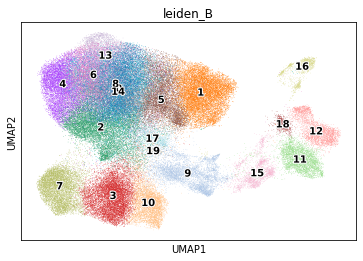

In [38]:
sc.tl.leiden(bdata, key_added = 'leiden_B')
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

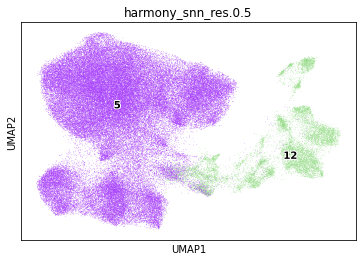

In [33]:
sc.pl.umap(bdata, color = 'harmony_snn_res.0.5', legend_loc = 'on data', legend_fontoutline = 2)

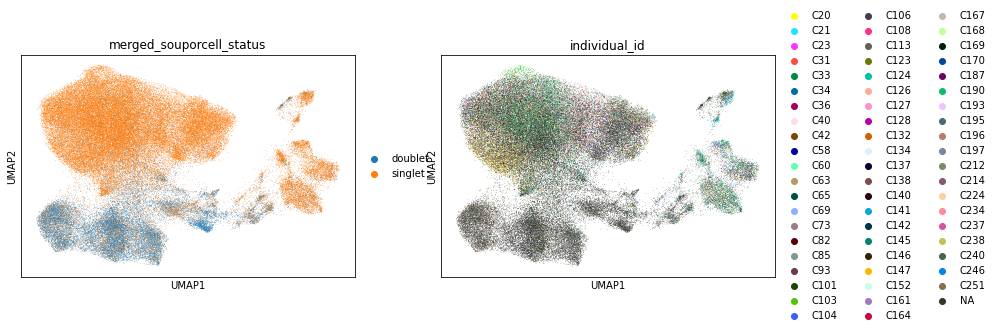

In [34]:
sc.pl.umap(bdata, color=['merged_souporcell_status', 'individual_id'])

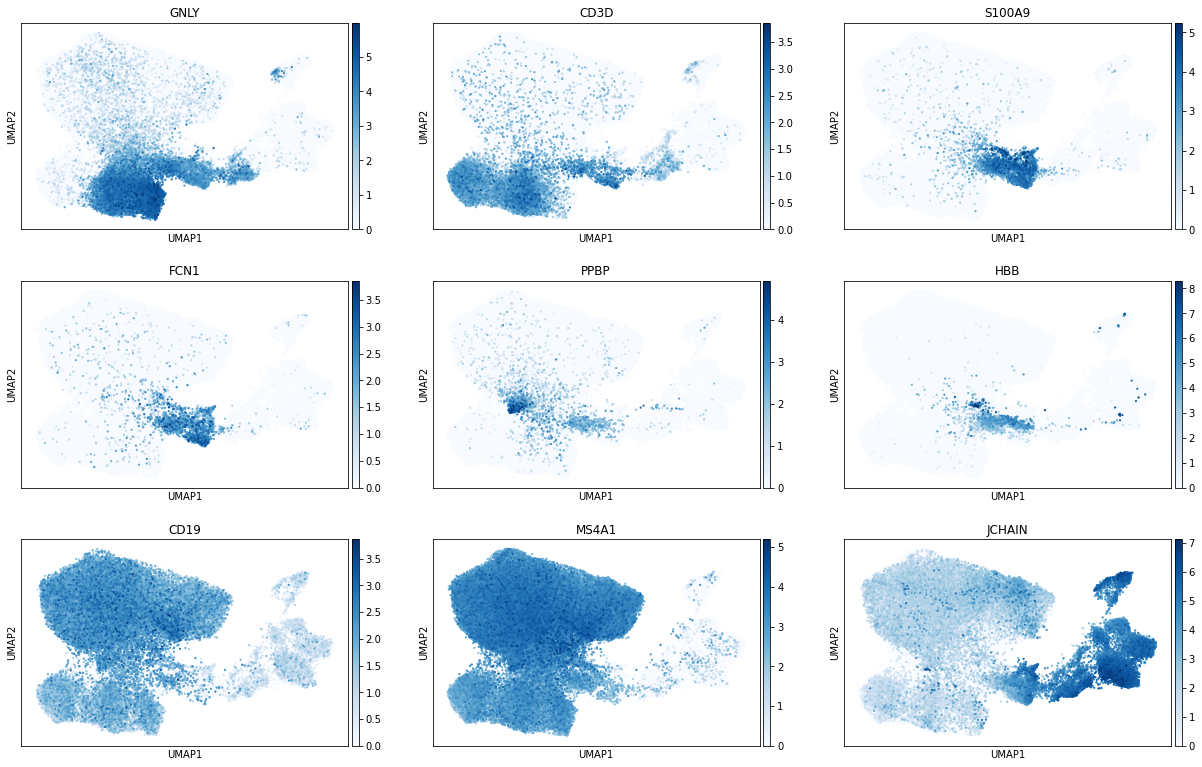

In [35]:
sc.pl.umap(bdata, color=['GNLY', 'CD3D', 'S100A9', 'FCN1', 'PPBP', 'HBB', 'CD19', 'MS4A1', 'JCHAIN'], color_map = 'Blues', size = 20, ncols = 3)

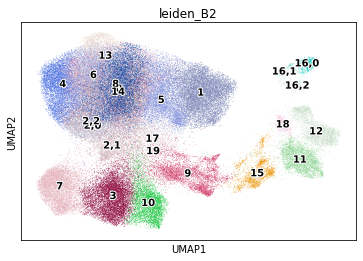

In [41]:
sc.tl.leiden(bdata, key_added = 'leiden_B2', restrict_to = ('leiden_B', ['16']), resolution = .2)
sc.tl.leiden(bdata, key_added = 'leiden_B2', restrict_to = ('leiden_B2', ['2']), resolution = .3)
sc.pl.umap(bdata, color = 'leiden_B2', legend_loc = 'on data', legend_fontoutline = 2)

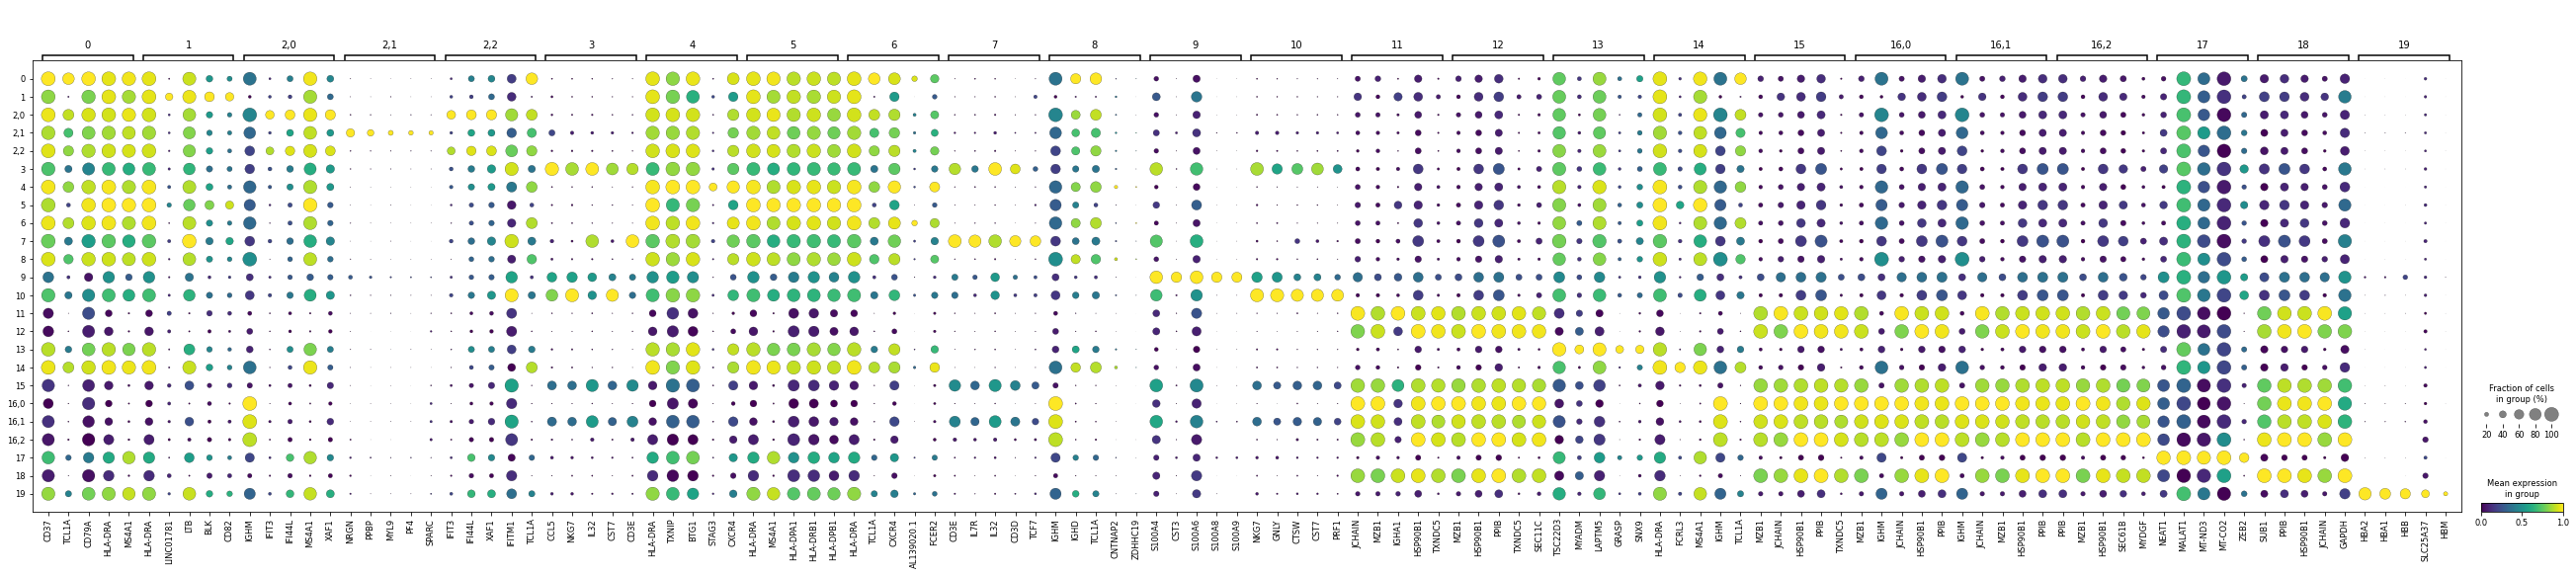

In [42]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B2')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=5, standard_scale = 'var', color_map = 'viridis', dendrogram = False)

/tmp/ipykernel_62641/4220681384.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bdata.obs['initial_cluster_B'] = [new_dict[x] for x in bdata.obs['leiden_B2']]
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'initial_cluster_B' as categorical


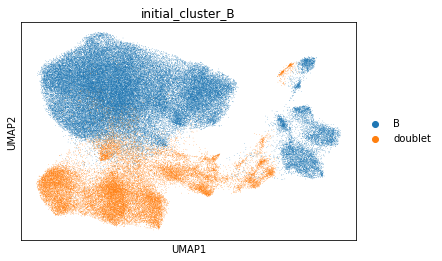

In [43]:
new_dict = {'0':'B',
'1':'B',
'2,0':'B',
'2,1':'doublet',
'2,2':'B',
'3':'doublet',
'4':'B',
'5':'B',
'6':'B',
'7':'doublet',
'8':'B',
'9':'doublet',
'10':'doublet',
'11':'B',
'12':'B',
'13':'B',
'14':'B',
'15':'doublet',
'16,0':'B',
'16,1':'doublet',
'16,2':'B',
'17':'B',
'18':'B',
'19':'doublet',}
bdata.obs['initial_cluster_B'] = [new_dict[x] for x in bdata.obs['leiden_B2']]
sc.pl.umap(bdata, color = 'initial_cluster_B')

In [44]:
# update the original object's labels too
adata.obs['initial_cluster_B'] = pd.Series(bdata.obs['initial_cluster_B'].astype('object'))

/tmp/ipykernel_62641/3347214430.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs['initial_cluster_B'] = pd.Series(bdata.obs['initial_cluster_B'].astype('object'))


### repeat filtering

In [45]:
# subset to B cell looking clusters
bdata = adata[adata.obs['initial_cluster_B'].isin(['B'])].copy()
bdata

AnnData object with n_obs × n_vars = 70501 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartme

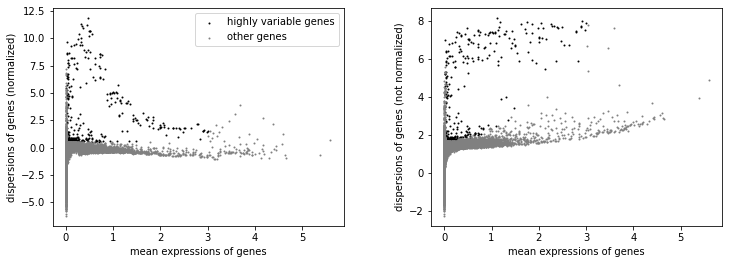

In [46]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

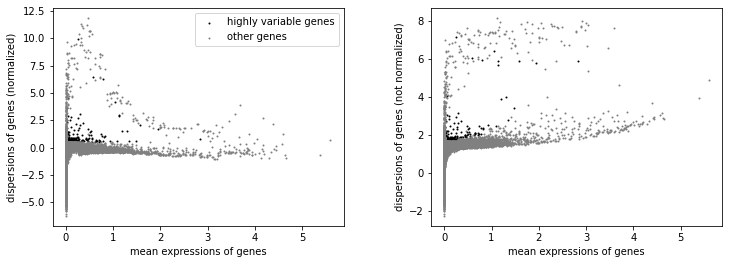

In [47]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL|^MTRN', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [48]:
# transfer to .raw slot
bdata.raw = bdata

In [49]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 70501 × 318
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [50]:
scvi.model.SCVI.setup_anndata(
    bdata,
    layer="counts",
    batch_key = 'orig.ident',
    categorical_covariate_keys = ['individual_id'],
    continuous_covariate_keys=['nCount_RNA', 'percentMito']
)

INFO     Using batches from adata.obs["orig.ident"]                                          
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 70501 cells, 318 vars, 119        
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 2 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:728: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[alternate_column_key] = codes
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:743: UserWarning: Category 31 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  warnings.warn(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:586: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, 

In [51]:
model = scvi.model.SCVI(bdata)
model

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/_utils.py:272: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  warnings.warn(


SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [52]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/113:   0%|                                                                                          | 0/113 [00:00<?, ?it/s]

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 113/113: 100%|██████████████████████████████████████████████████████████| 113/113 [09:10<00:00,  4.87s/it, loss=56.6, v_num=1]


In [53]:
latent = model.get_latent_representation()

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [54]:
bdata.obsm["X_scVI"] = latent
sc.pp.neighbors(bdata, use_rep="X_scVI")
sc.tl.umap(bdata, min_dist=0.3)

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scanpy/tools/_leiden.py:158: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[key_added] = pd.Categorical(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'initial_cluster_B' as categorical


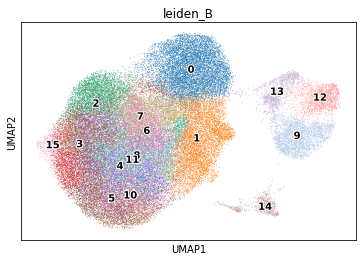

In [55]:
sc.tl.leiden(bdata, key_added = 'leiden_B')
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

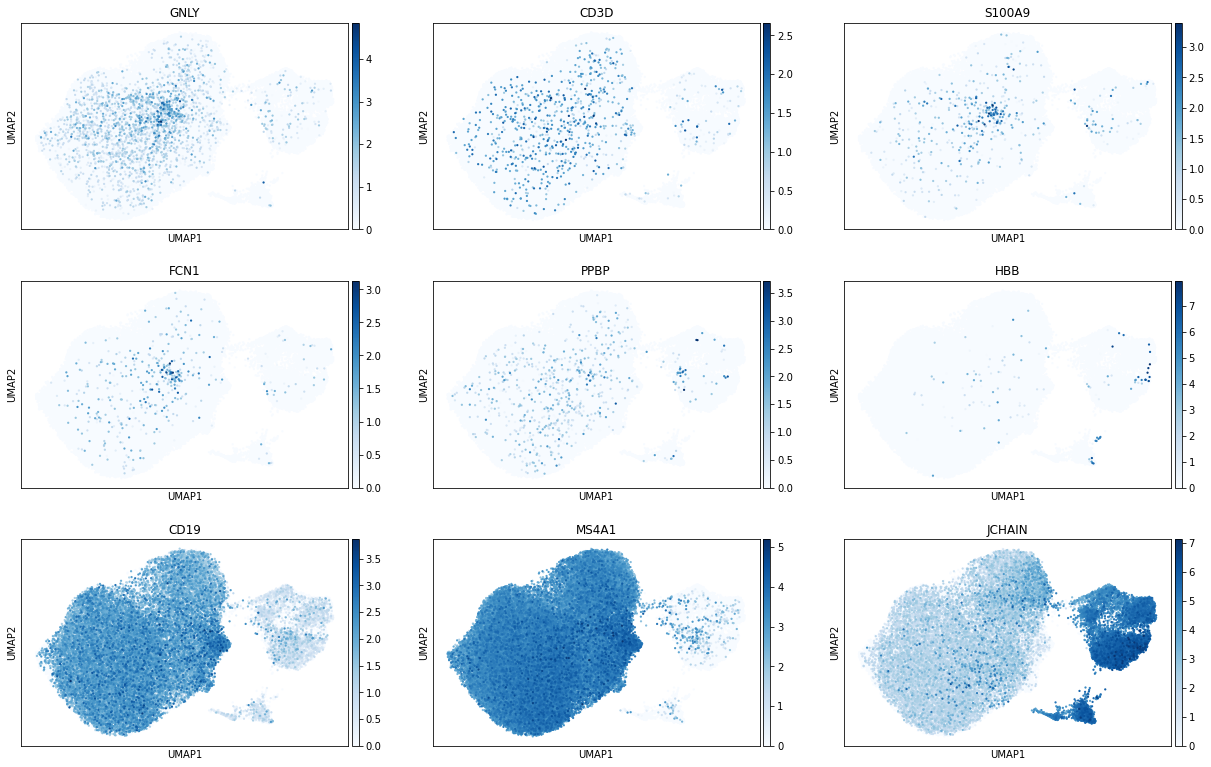

In [56]:
sc.pl.umap(bdata, color=['GNLY', 'CD3D', 'S100A9', 'FCN1', 'PPBP', 'HBB', 'CD19', 'MS4A1', 'JCHAIN'], color_map = 'Blues', size = 20, ncols = 3)

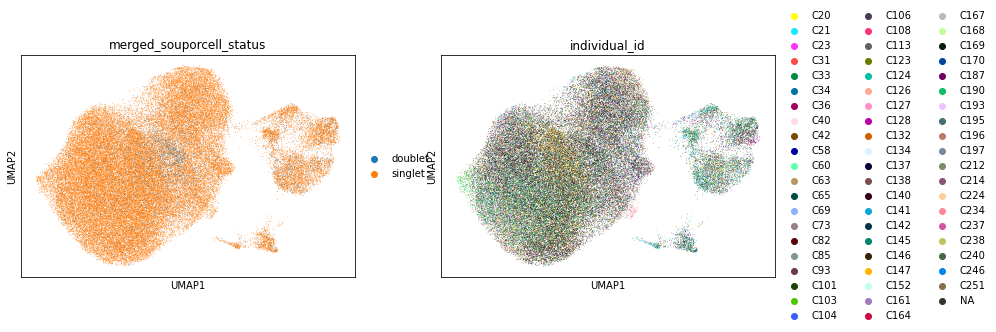

In [57]:
sc.pl.umap(bdata, color=['merged_souporcell_status', 'individual_id'])

/tmp/ipykernel_62641/2691129826.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bdata.obs['leiden_B_soc'] = [a + '_' + b for a,b in zip(bdata.obs['leiden_B'], bdata.obs['merged_souporcell_status'])]
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'leiden_B_soc' as categorical


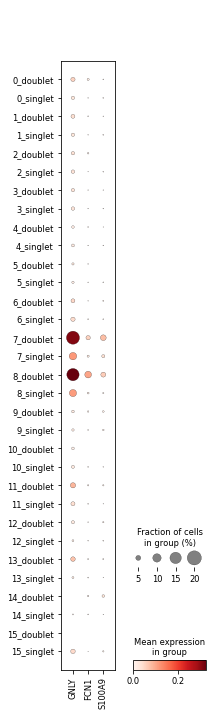

In [74]:
bdata.obs['leiden_B_soc'] = [a + '_' + b for a,b in zip(bdata.obs['leiden_B'], bdata.obs['merged_souporcell_status'])]
sc.pl.dotplot(bdata, ['GNLY','FCN1','S100A9'], groupby = 'leiden_B_soc')

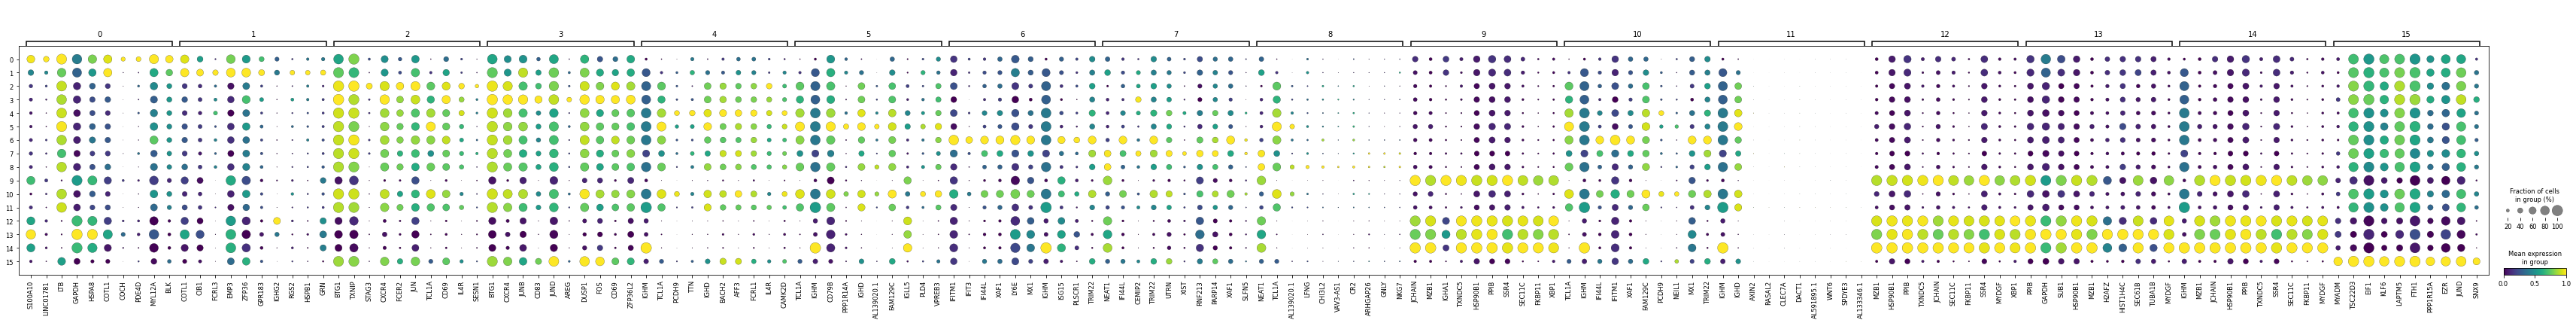

In [75]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=10, standard_scale = 'var',  color_map = 'viridis', dendrogram = False)

In [76]:
# ok this is pretty good then

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'initial_cluster_B' as categorical


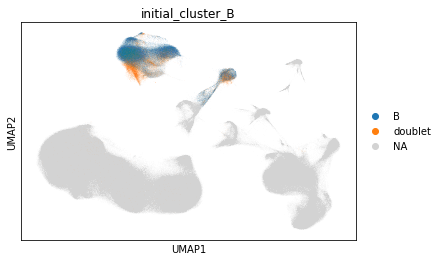

In [77]:
# update the original object's labels too
sc.pl.umap(adata, color = 'initial_cluster_B')

In [83]:
# save first
bdata.write_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_vdj.h5ad', compression = 'gzip')

In [84]:
adata.write_h5ad('h5ad/df.fil3_gex_kt.h5ad', compression = 'gzip')